In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://www.cpp.edu/~jcmcgarvey/5200/labs/images/butterfly.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))

image = np.asarray(image)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(320, 320, 3)


### Pixel Value
이미지 내의 특정 픽셀의 위치나 특정 체널을 지정할 수 있다.

In [15]:
temp_px = image[200, 200]
print(temp_px)

[ 83 168 160]


In [17]:
temp_channel = image[200, 200, 2]
print(temp_channel)

160


### 값 변경

In [19]:
image[100, 100] = [0, 0, 0]
image[101, 100] = [0, 0, 0]
image[102, 100] = [0, 0, 0]
image[103, 100] = [0, 0, 0]
image[104, 100] = [0, 0, 0]
image[105, 100] = [0, 0, 0]
image[106, 100] = [0, 0, 0]
image[107, 100] = [0, 0, 0]
image[108, 100] = [0, 0, 0]
image[109, 100] = [0, 0, 0]

In [21]:
cv2.imshow('title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 슬라이싱

In [22]:
print(image[:100, :100].shape)

(100, 100, 3)


In [24]:
cv2.imshow('title', image[:100, :100])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
white_box = image[:150, :150] # 잘래낸 부분을 white_box라는 변수에 할당한다.
white_box = [255, 255, 255] # 이 변수의 모든 값을 255, 255, 255로 채우기

image[:150, :150] = white_box # 255, 255, 255

cv2.imshow('title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 ROI
특정 이미지 영역 단위로 작업 → numpy indexing 이용

In [56]:
image = cv2.imread('../Python + OpenCV/picture/moon.jpg')
print(image.shape)

(495, 743, 3)


In [57]:
cv2.imshow('title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
moon = image[140:280, 460:600]
cv2.imshow('moon', moon)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
image[100:240, 600:740] = moon
cv2.imshow('moon', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지와 체널
* split : 각 체널의 분리 (별로 권장 안함 - memory copy로 비용이 많이 든다)
* merge : 각 체널을 합치기 

In [60]:
b, g, r = cv2.split(image)

In [61]:
print(b)
print(b.shape)

[[61 61 61 ... 16 16 16]
 [61 61 61 ... 15 15 15]
 [61 61 63 ... 14 14 14]
 ...
 [ 5  5  6 ...  0  0  0]
 [ 3  4  4 ...  0  0  0]
 [ 4  4  4 ...  2  2  2]]
(495, 743)


In [62]:
print(g)
print(g.shape)

[[40 40 40 ...  2  2  2]
 [40 40 40 ...  1  1  1]
 [40 40 40 ...  0  0  0]
 ...
 [16 16 17 ...  0  0  0]
 [14 15 15 ...  0  0  0]
 [15 15 15 ...  0  0  0]]
(495, 743)


In [63]:
print(r)
print(r.shape)

[[25 25 25 ...  3  3  3]
 [25 25 25 ...  2  2  2]
 [25 25 25 ...  1  1  1]
 ...
 [20 20 21 ...  0  0  0]
 [18 19 19 ...  0  0  0]
 [19 19 19 ...  0  0  0]]
(495, 743)


In [64]:
img = cv2.merge((b, g, r))
print(img.shape)

(495, 743, 3)


In [66]:
cv2.imshow('title', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
### r 체널을 0으로 값 변경
img[:, :, 2] = 0
cv2.imshow('title', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
### g 체널을 255 으로 값 변경
img[:, :, 1] = 255
cv2.imshow('title', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
### g 체널을 0 으로 값 변경
img[:, :, 1] = 0
cv2.imshow('title', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
### b 체널을 0으로 값 변경
img[:, :, 0] = 0
cv2.imshow('title', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 더하기
* add() : saturation 연산 → 0 이하는 0, 255 이상은 255
* addWeighted() : modulo 연산 → 256이상은 256으로 나눈 나머지로 값을 돌려준다
* numpy 더하기

In [71]:
x = np.uint8([250])
y = np.uint8([10])

In [72]:
# cv.add() 연산
print(cv2.add(x, y)) # 최대값은 고정되어있다.

[[255]]


In [74]:
# numpy 연산
print(x + y) # 260 / 256 의 나머지 출력

[4]


##### 이미지 연산

(200, 150, 3)
(200, 150, 3)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x27a4e36da30>)

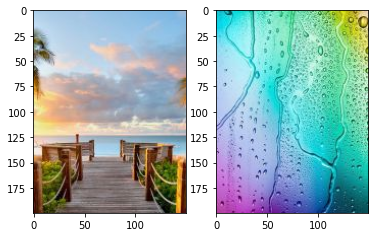

In [4]:
from io import BytesIO
from PIL import Image
import requests

### 이미지 불러오기
url1 = 'https://wall2mob.com/cx/m/t2/40379-5.jpg'
response1 = requests.get(url1)
image1 = Image.open(BytesIO(response1.content))

url2 = 'https://wall2mob.com/cx/m/t2/28399-5.jpg' 
response2 = requests.get(url2)
image2 = Image.open(BytesIO(response2.content))

# 이미지 파일 numpy로 전환
image1 = np.asarray(image1)
image2 = np.asarray(image2)
print(image1.shape)
print(image2.shape)

plt.subplot(121), plt.imshow(image1)
plt.subplot(122), plt.imshow(image2)

In [5]:
### openCV에서 사용하기 위해 bgr 파일로 전환하기
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)

cv2.imshow('flower', image1)
cv2.imshow('butterfly', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
result1 = cv2.add(image1, image2)

cv2.imshow('title', result1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
result2 = image1 + image2

cv2.imshow('title', result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 비트 연산

* bitwise_and : 둘 다 0이 아니면 값을 출력 (하나라도 0이면 0 출력)
* bitwise_or : 둘 중 하나가 0이면 값을 출력 (하나라도 값이 있으면 값을 출력)
* bitwise_not : 해당 값에 대해 부정값을 통과
* bitwise_xor : 두 요소의 논리적 배타값을 통과 (값이 둘다 있으면 0을 출력)

(260, 260)


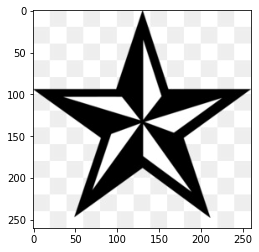

In [134]:
url = 'https://spng.subpng.com/20180401/zvq/kisspng-art-texas-texas-star-parkway-clip-art-black-star-5ac0ee2049b9e4.177744061522593312302.jpg' 

response = requests.get(url)
image = Image.open(BytesIO(response.content))

star = np.asarray(image, dtype = np.uint8)
print(star.shape)
plt.imshow(star, cmap='gray')
plt.show()

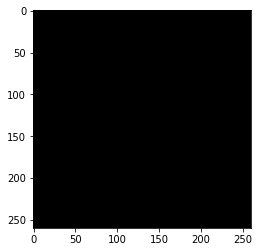

In [135]:
black_img = np.zeros((260, 260))
plt.imshow(black_img, cmap='gray')
plt.show()

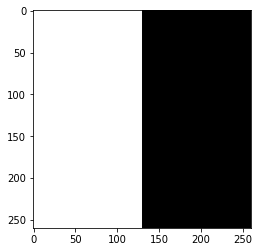

In [136]:
black_img[:, :130] = 255
black_img = black_img.astype(np.uint8)
plt.imshow(black_img, cmap='gray')
plt.show()

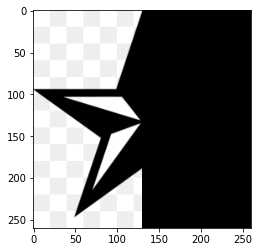

In [137]:
### bitwise_and 연산 : 둘 중 하나라도 검정(0) 이면 검정 출력
result = cv2.bitwise_and(black_img, star)
plt.imshow(result, cmap='gray')
plt.show()

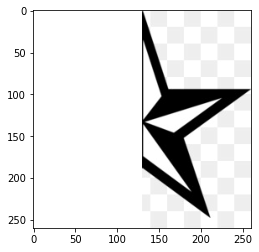

In [138]:
### bitwise_or : 둘중 하나라도 값이 있으면 (검정이 아니면) 색을 출력
result2 = cv2.bitwise_or(black_img, star)
plt.imshow(result2, cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x20b19c31cd0>)

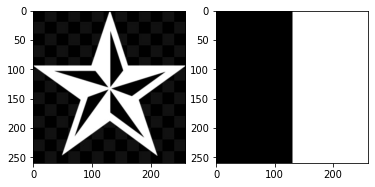

In [139]:
### bitwise_not : 반전 그림 출력
result3 = cv2.bitwise_not(star)
result4 = cv2.bitwise_not(black_img)
plt.subplot(121), plt.imshow(result3, cmap = 'gray')
plt.subplot(122), plt.imshow(result4, cmap = 'gray')

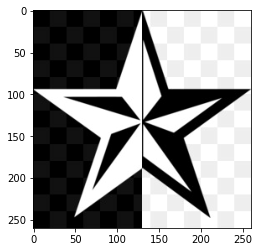

In [140]:
### bitwise_xor = not + or = 둘다 값이 있으면 검정(0)을 반환, 둘다 값이 없으면 흰색(255)를 반환
result5 = cv2.bitwise_xor(star, black_img)
plt.imshow(result5, cmap='gray')

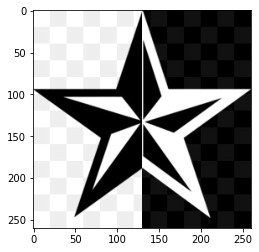

In [146]:
temp_star = cv2.bitwise_not(star)
result6 = cv2.bitwise_xor(temp_star, black_img)
plt.imshow(result6, cmap = 'gray')

### 비트 연산 예시 - 이미지에 로고 넣기

(706, 816, 4)


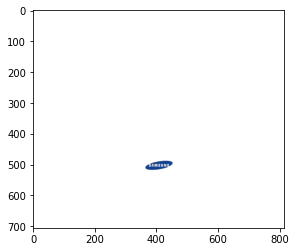

In [244]:
from io import BytesIO
from PIL import Image
import requests

url = 'https://t1.daumcdn.net/cfile/tistory/25049D3758E7D95610'
response = requests.get(url)
image = Image.open(BytesIO(response.content))

image = np.asarray(image, dtype='uint8')
logo = cv2.resize(image, None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_AREA)
logo = cv2.copyMakeBorder(logo, 453, 153, 358, 358, borderType = cv2.BORDER_CONSTANT)
print(logo.shape)
plt.imshow(logo)

(606, 816, 3)


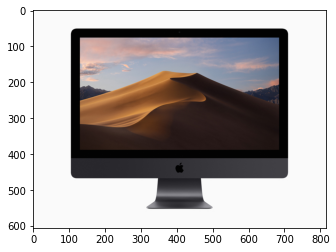

In [245]:
url = 'https://www.apple.com/newsroom/images/product/os/macos/standard/macOS_preview_Hero_06042018_big.jpg.large.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
mac = np.asarray(image, dtype="uint8")
print(mac.shape)
plt.imshow(mac)

In [246]:
rows, cols, channels = mac.shape
logo = logo[0:rows, 0:cols, :3]
print(logo.shape)
print(mac.shape)

(606, 816, 3)
(606, 816, 3)


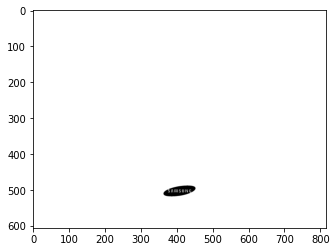

In [270]:
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
logo_gray = cv2.bitwise_not(logo_gray)
plt.imshow(logo_gray, cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


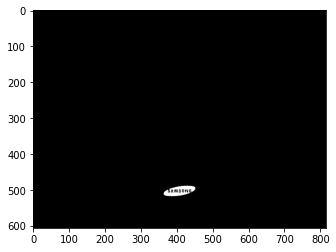

In [271]:
ret, mask = cv2.threshold(logo_gray, 200, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
print(mask)
plt.imshow(mask, cmap='gray')

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


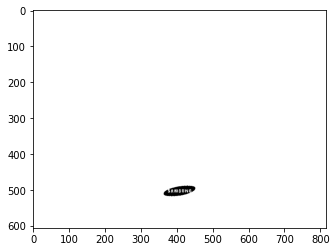

In [272]:
print(mask_inv)
plt.imshow(mask_inv, cmap='gray')

In [274]:
img1_fg = cv2.bitwise_and(logo, logo, mask=mask)
img2_bg = cv2.bitwise_and(mac, mac, mask=mask_inv)

dst = cv2.add(img1_fg, img2_bg)
cv2.imshow('title', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Blending
* addweighted() : 사이즈가 같은 두 이미지의 비율을 골라서 섞을 수 있다.

(2621, 3931, 3)


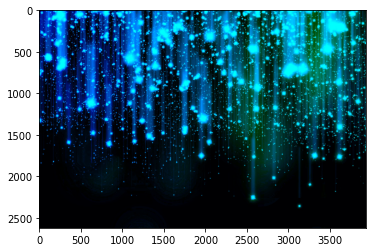

In [277]:
url = 'https://cdn.hipwallpaper.com/i/32/10/gHBm25.jpg'
response = requests.get(url)
background = Image.open(BytesIO(response.content))
background = np.asarray(background, dtype='uint8')
plt.imshow(background)
print(background.shape)

(480, 480, 3)


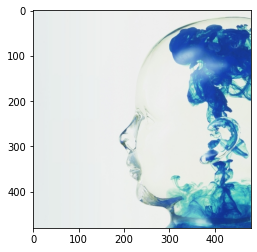

In [280]:
url = 'https://images.wallpapersden.com/image/download/face-image-profile_Z21maJSZmpqtpaSklGltZa1pbWU.jpg'
response = requests.get(url)
picture = Image.open(BytesIO(response.content))
picture = np.asarray(picture, dtype='uint8')
plt.imshow(picture)
print(picture.shape)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x20b197a0280>)

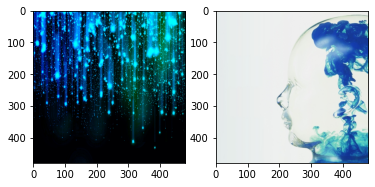

In [281]:
background = cv2.resize(background, (480, 480))
picture = cv2.resize(picture, (480, 480))
plt.subplot(121), plt.imshow(background)
plt.subplot(122), plt.imshow(picture)

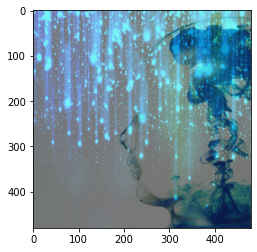

In [296]:
blended1 = cv2.addWeighted(src1=background, alpha=0.5,
                          src2=picture, beta=0.5, gamma=0)
plt.imshow(blended1)

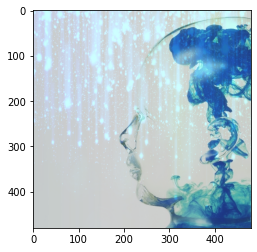

In [294]:
blended2 = cv2.addWeighted(src1=background, alpha=0.2,
                           src2=picture, beta=0.8, gamma=15)
plt.imshow(blended2)